In [ ]:
# @title
from google.colab import drive
drive.mount('/content/drive' , force_remount="True")

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import auc
from prettytable import PrettyTable

##NOTE
you need to replace the following paths with the paths of the below files in the environment you're running the notebook:

`dfDomD --> path to the file results/metrics/prediction_accuracy/O-Physicho-per-domain.txt`

`dfDomM --> path to the file results/metrics/prediction_accuracy/N-Physicho-per-domain.txt`

`dfD --> path to the file results/metrics/prediction_accuracy/O-Physicho-full-chain.txt`

`dfM --> path to the file results/metrics/prediction_accuracy/N-Physicho-full-chain.txt`

All files available [here](https://github.com/HadisAhmadian/DIAFold/tree/main/results)


In [ ]:
tm_p="./drive/MyDrive/tst/result/out-tm/"
file_path = tm_p+'out c45-ref-dom-d-out.txt' #
dfDomD = pd.read_csv(file_path, sep='\t')
file_path = tm_p+'out c45-ref-dom-m-out-2.txt' #
dfDomM = pd.read_csv(file_path, sep='\t')
file_path = tm_p+'out c45-ref-d-out.txt' #
dfD = pd.read_csv(file_path, sep='\t')
file_path = tm_p+'out c45-ref-m-out-2.txt' #
dfM = pd.read_csv(file_path, sep='\t')
dfM.head()

Mounted at /content/drive


1. **RMSD (Root-Mean-Square Deviation)**: This measures the average distance between atoms (usually the backbone atoms) of superimposed proteins. A lower RMSD indicates a higher similarity between the structures².

2. **TM (Template Modeling) Score (d0)**: This score assesses the quality of protein structure alignments. It ranges from 0 to 1, where a higher score indicates a better alignment. The parameter \(d0\) is a scaling factor used in the calculation¹.

3. **MaxSub (Maximum Substructure)**: This method identifies the largest subset of residues that can be superimposed within a given distance threshold \(d0\). It focuses on the most structurally conserved regions¹.

4. **GDT-TS (Global Distance Test - Total Score)**: This score evaluates the overall similarity between two protein structures by considering multiple distance thresholds (1, 2, 4, and 8 Å). It is expressed as a percentage, with higher values indicating better alignment¹.

5. **ts-d1, ts-d2, ts-d4, ts-d8**: These are the individual components of the GDT-TS score, representing the percentage of residues within 1, 2, 4, and 8 Å distance thresholds, respectively¹.

6. **GDT-HA (Global Distance Test - High Accuracy)**: Similar to GDT-TS, but uses stricter distance thresholds (0.5, 1, 2, and 4 Å) to provide a more stringent measure of structural similarity¹.

7. **ha-d1, ha-d2, ha-d4, ha-d8**: These are the individual components of the GDT-HA score, representing the percentage of residues within 0.5, 1, 2, and 4 Å distance thresholds, respectively¹.



In [ ]:
# @title
for metric in ["TM","MaxSub","GDT-TS","GDT-HA "]:
  print(metric+ " max per domain:")
  idx = dfDomD.groupby("ref")[metric].idxmax()
  df = dfDomD.loc[idx].reset_index(drop=True)
  print("DIAMOND:")
  headers = ["mean","median","stdev","variane"]
  values = [df[metric].mean(),df[metric].median(),df[metric].std(),df[metric].var()]
  table = PrettyTable(headers)
  table.add_row(values)
  print(table)
  idx = dfDomM.groupby("ref")[metric].idxmax()
  df = dfDomM.loc[idx].reset_index(drop=True)
  print("MMseqs:")
  headers = ["mean","median","stdev","variane"]
  values = [df[metric].mean(),df[metric].median(),df[metric].std(),df[metric].var()]
  table = PrettyTable(headers)
  table.add_row(values)
  print(table)
  print("****************************************************************************\n")
  print(metric+ " max per chain:")
  idx = dfD.groupby("ref")[metric].idxmax()
  df = dfD.loc[idx].reset_index(drop=True)
  print("DIAMOND:")
  headers = ["mean","median","stdev","variane"]
  values = [df[metric].mean(),df[metric].median(),df[metric].std(),df[metric].var()]
  table = PrettyTable(headers)
  table.add_row(values)
  print(table)
  idx = dfM.groupby("ref")[metric].idxmax()
  df = dfM.loc[idx].reset_index(drop=True)
  print("MMseqs:")
  headers = ["mean","median","stdev","variane"]
  values = [df[metric].mean(),df[metric].median(),df[metric].std(),df[metric].var()]
  table = PrettyTable(headers)
  table.add_row(values)
  print(table)
  print("****************************************************************************\n")

TM max per domain:
DIAMOND:
+---------+--------+--------------------+----------------------+
|   mean  | median |       stdev        |       variane        |
+---------+--------+--------------------+----------------------+
| 0.89066 | 0.9558 | 0.1545787581480335 | 0.023894592470588238 |
+---------+--------+--------------------+----------------------+
MMseqs:
+--------------------+--------+---------------------+---------------------+
|        mean        | median |        stdev        |       variane       |
+--------------------+--------+---------------------+---------------------+
| 0.8831714285714286 | 0.954  | 0.16287356440869485 | 0.02652779798319327 |
+--------------------+--------+---------------------+---------------------+
****************************************************************************

TM max per chain:
DIAMOND:
+--------------------+--------+---------------------+---------------------+
|        mean        | median |        stdev        |       variane       |
+-

In [ ]:
# @title
for metric in ["RMSD"]:
  print(metric+ " min per domain:")
  idx = dfDomD.groupby("ref")[metric].idxmin()
  df = dfDomD.loc[idx].reset_index(drop=True)
  print("DIAMOND:")
  headers = ["mean","median","stdev","variane"]
  values = [df[metric].mean(),df[metric].median(),df[metric].std(),df[metric].var()]
  table = PrettyTable(headers)
  table.add_row(values)
  print(table)
  idx = dfDomM.groupby("ref")[metric].idxmin()
  df = dfDomM.loc[idx].reset_index(drop=True)
  print("MMseqs:")
  headers = ["mean","median","stdev","variane"]
  values = [df[metric].mean(),df[metric].median(),df[metric].std(),df[metric].var()]
  table = PrettyTable(headers)
  table.add_row(values)
  print(table)
  print("****************************************************************************\n")
  print(metric+ " min per chain:")
  idx = dfD.groupby("ref")[metric].idxmin()
  df = dfD.loc[idx].reset_index(drop=True)
  print("DIAMOND:")
  headers = ["mean","median","stdev","variane"]
  values = [df[metric].mean(),df[metric].median(),df[metric].std(),df[metric].var()]
  table = PrettyTable(headers)
  table.add_row(values)
  print(table)
  idx = dfM.groupby("ref")[metric].idxmin()
  df = dfM.loc[idx].reset_index(drop=True)
  print("MMseqs:")
  headers = ["mean","median","stdev","variane"]
  values = [df[metric].mean(),df[metric].median(),df[metric].std(),df[metric].var()]
  table = PrettyTable(headers)
  table.add_row(values)
  print(table)
  print("****************************************************************************\n")

RMSD min per domain:
DIAMOND:
+-------------------+--------+------------------+--------------------+
|        mean       | median |      stdev       |      variane       |
+-------------------+--------+------------------+--------------------+
| 3.232057142857143 | 1.541  | 4.46934466799603 | 19.975041761344542 |
+-------------------+--------+------------------+--------------------+
MMseqs:
+--------------------+--------+--------------------+--------------------+
|        mean        | median |       stdev        |      variane       |
+--------------------+--------+--------------------+--------------------+
| 3.2873428571428573 | 1.396  | 4.4485345765759305 | 19.789459878991593 |
+--------------------+--------+--------------------+--------------------+
****************************************************************************

RMSD min per chain:
DIAMOND:
+-------------------+--------+-------------------+-------------------+
|        mean       | median |       stdev       |      var

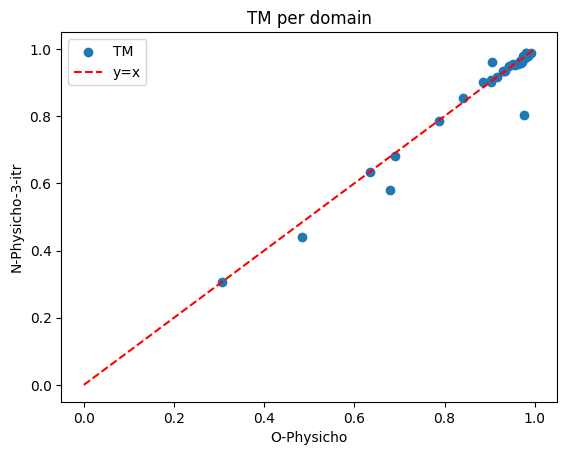

<ipython-input-5-9c6164f6254a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=metric, data=combined_df, palette="Set2")


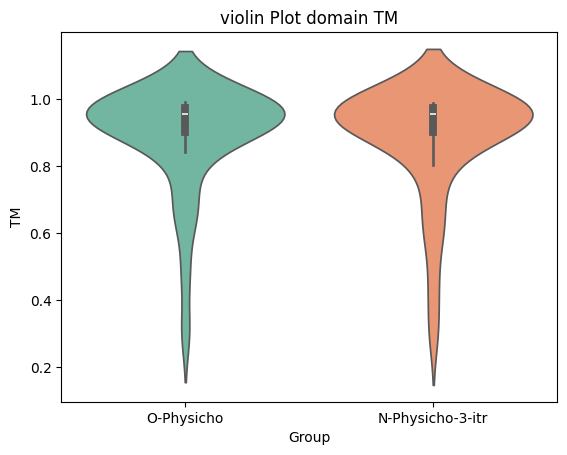

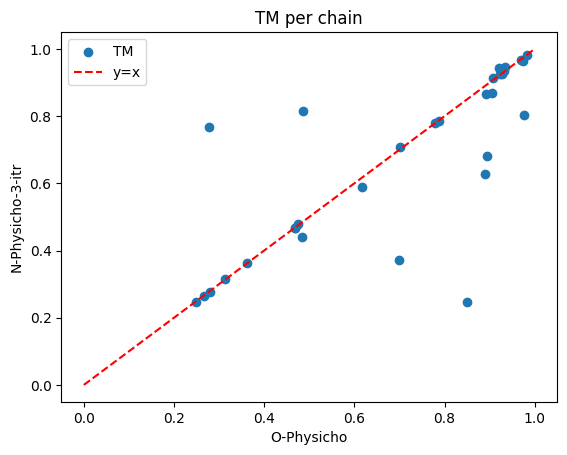

<ipython-input-5-9c6164f6254a>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=metric, data=combined_df, palette="Set2")


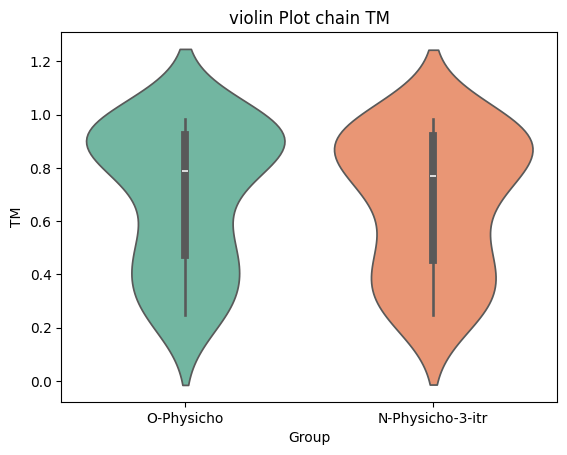

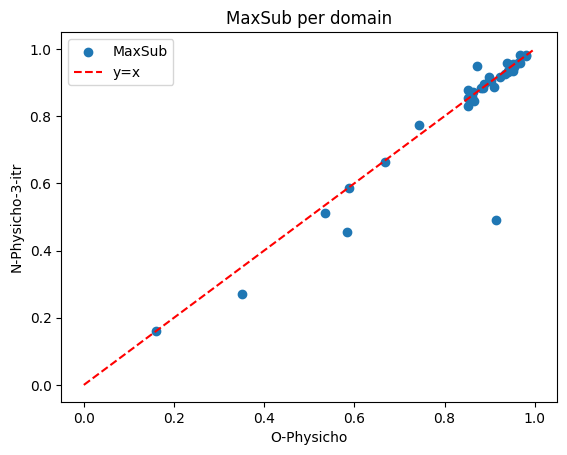

<ipython-input-5-9c6164f6254a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=metric, data=combined_df, palette="Set2")


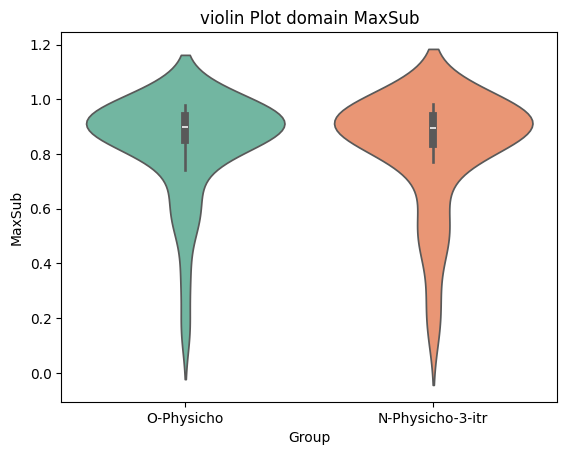

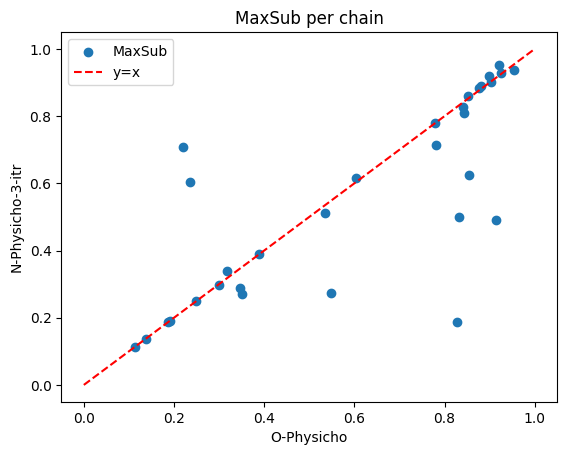

<ipython-input-5-9c6164f6254a>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=metric, data=combined_df, palette="Set2")


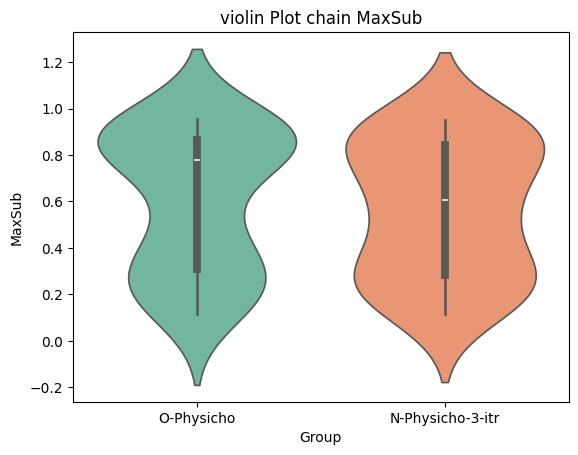

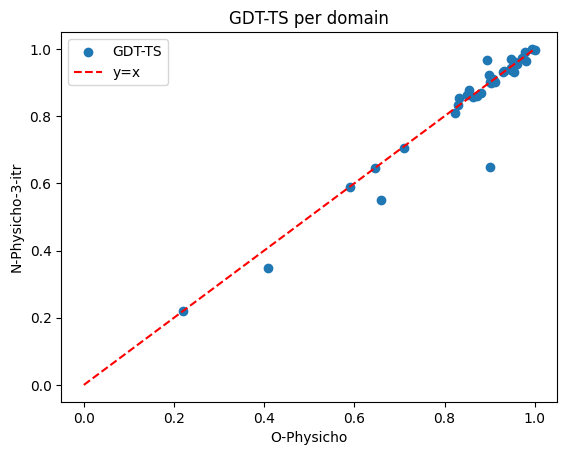

<ipython-input-5-9c6164f6254a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=metric, data=combined_df, palette="Set2")


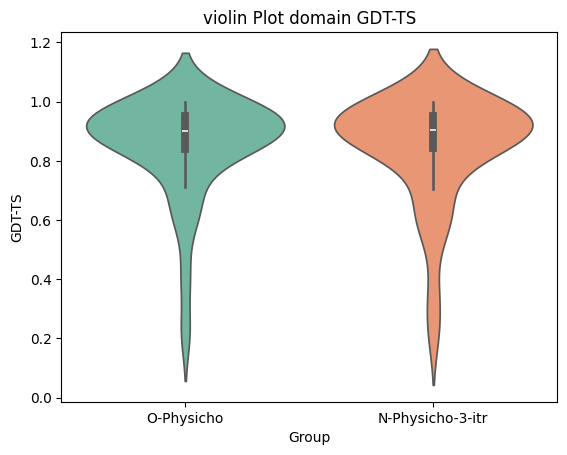

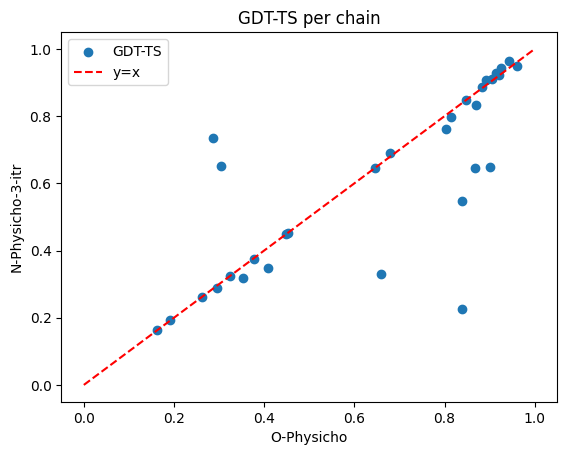

<ipython-input-5-9c6164f6254a>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=metric, data=combined_df, palette="Set2")


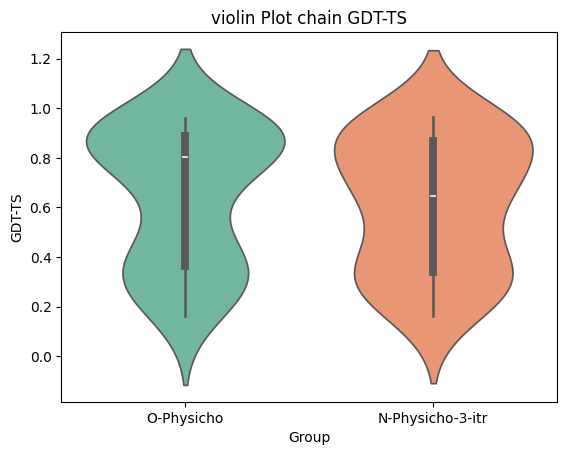

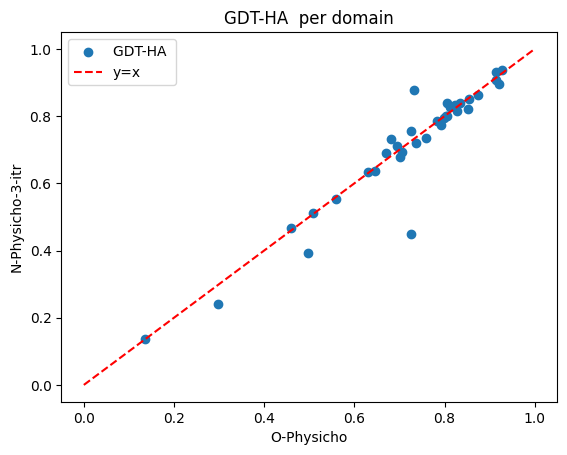

<ipython-input-5-9c6164f6254a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=metric, data=combined_df, palette="Set2")


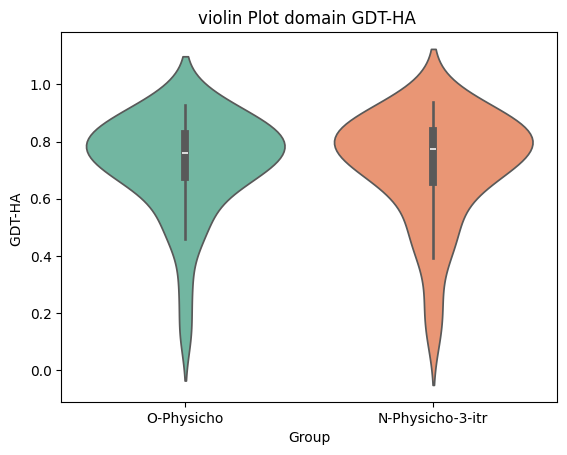

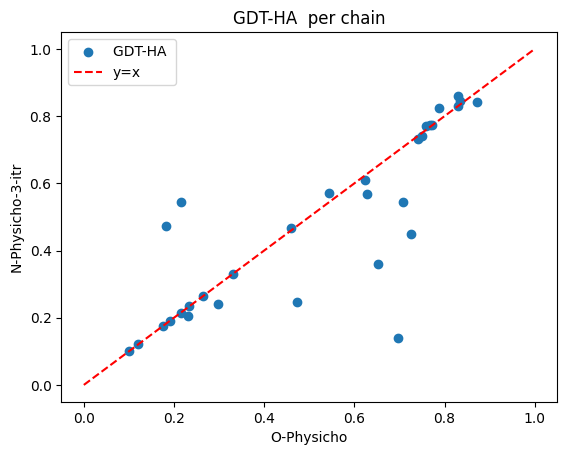

<ipython-input-5-9c6164f6254a>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=metric, data=combined_df, palette="Set2")


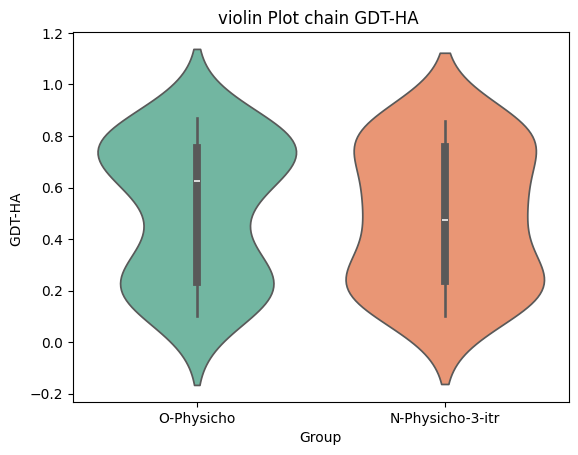

In [ ]:
# @title
x_data = np.linspace(0, 1, 100)
y_data = np.sin(x_data)

for metric in ["TM","MaxSub","GDT-TS","GDT-HA "]:
  idx = dfDomD.groupby("ref")[metric].idxmax()
  df1 = dfDomD.loc[idx].reset_index(drop=True)
  idx = dfDomM.groupby("ref")[metric].idxmax()
  df2 = dfDomM.loc[idx].reset_index(drop=True)
  common_df = pd.merge(df1, df2, on="ref")
  #print(common_df.columns)
  plt.scatter(common_df[metric+"_x"], common_df[metric+"_y"], label=metric)
  plt.plot(x_data, x_data, label='y=x', linestyle='--', color='red')
  plt.xlabel('O-Physicho')
  plt.ylabel('N-Physicho-3-itr')
  plt.title(metric+" per domain")
  plt.legend()
  plt.show()

  list1 = list(common_df[metric+"_x"])
  list2 = list(common_df[metric+"_y"])
  # Create DataFrames for each list with unique indices
  df11 = pd.DataFrame({metric: list1, 'Group': ['O-Physicho'] * len(list1)})
  df22 = pd.DataFrame({metric: list2, 'Group': ['N-Physicho-3-itr'] * len(list2)})
  # Combine the DataFrames without resetting the index
  combined_df = pd.concat([df11, df22], ignore_index=True)
  # Plot the box plots using seaborn
  sns.violinplot(x='Group', y=metric, data=combined_df, palette="Set2")
  plt.title('violin Plot domain '+metric)
  plt.ylabel(metric)
  plt.show()



  idx = dfD.groupby("ref")[metric].idxmax()
  df1 = dfD.loc[idx].reset_index(drop=True)
  idx = dfM.groupby("ref")[metric].idxmax()
  df2 = dfM.loc[idx].reset_index(drop=True)
  common_df = pd.merge(df1, df2, on="ref")
  plt.scatter(common_df[metric+"_x"], common_df[metric+"_y"], label=metric)
  plt.plot(x_data, x_data, label='y=x', linestyle='--', color='red')
  plt.xlabel('O-Physicho')
  plt.ylabel('N-Physicho-3-itr')
  plt.title(metric+" per chain")
  plt.legend()
  plt.show()

  list1 = list(common_df[metric+"_x"])
  list2 = list(common_df[metric+"_y"])
  # Create DataFrames for each list with unique indices
  df11 = pd.DataFrame({metric: list1, 'Group': ['O-Physicho'] * len(list1)})
  df22 = pd.DataFrame({metric: list2, 'Group': ['N-Physicho-3-itr'] * len(list2)})
  # Combine the DataFrames without resetting the index
  combined_df = pd.concat([df11, df22], ignore_index=True)
  # Plot the box plots using seaborn
  sns.violinplot(x='Group', y=metric, data=combined_df, palette="Set2")
  plt.title('violin Plot chain '+metric)
  plt.ylabel(metric)
  plt.show()

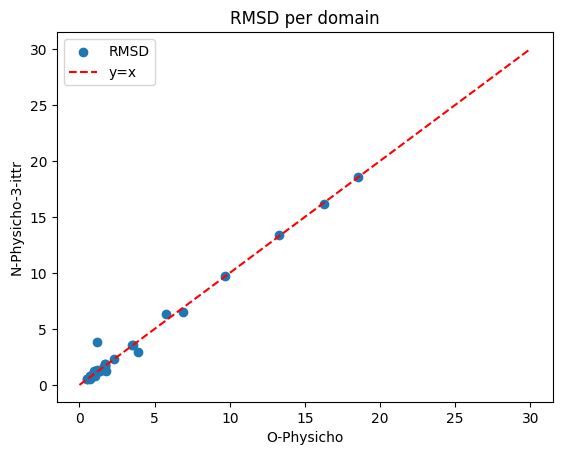

<ipython-input-6-20d8a5a1ffb3>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=metric, data=combined_df, palette="Set2")


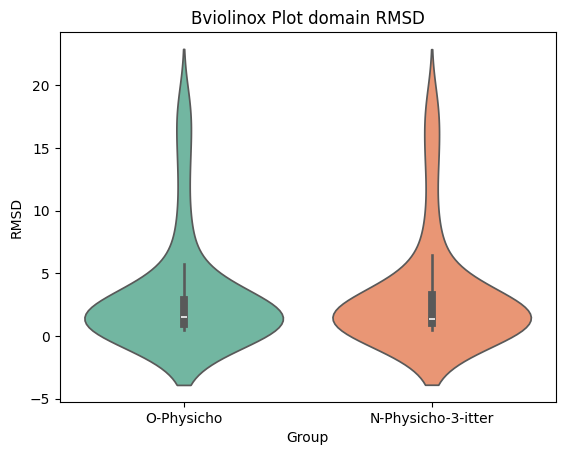

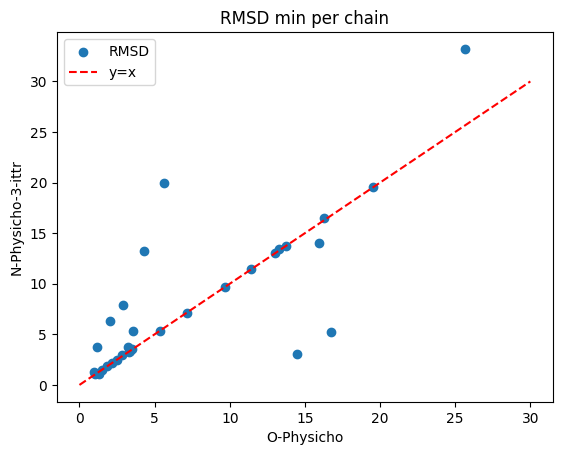

<ipython-input-6-20d8a5a1ffb3>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=metric, data=combined_df, palette="Set2")


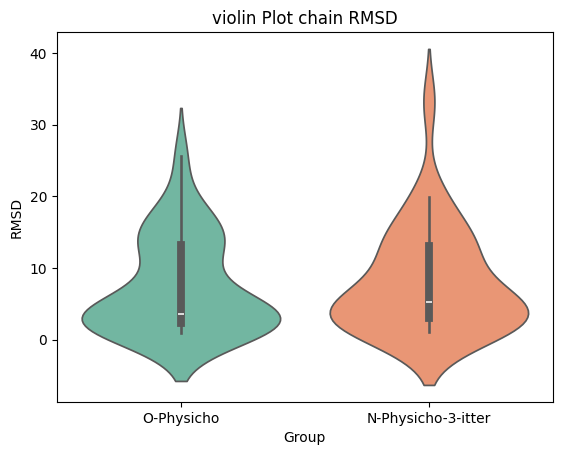

In [ ]:
# @title
x_data = np.linspace(0, 30, 100)
y_data = np.sin(x_data)
for metric in ["RMSD"]:
  idx = dfDomD.groupby("ref")[metric].idxmin()
  df1 = dfDomD.loc[idx].reset_index(drop=True)
  idx = dfDomM.groupby("ref")[metric].idxmin()
  df2 = dfDomM.loc[idx].reset_index(drop=True)
  common_df = pd.merge(df1, df2, on="ref")
  #print(common_df.columns)
  plt.scatter(common_df[metric+"_x"], common_df[metric+"_y"], label=metric)
  plt.plot(x_data, x_data, label='y=x', linestyle='--', color='red')
  plt.xlabel('O-Physicho')
  plt.ylabel('N-Physicho-3-ittr')
  plt.title(metric+" per domain")
  plt.legend()
  plt.show()


  list1 = list(common_df[metric+"_x"])
  list2 = list(common_df[metric+"_y"])
  # Create DataFrames for each list with unique indices
  df11 = pd.DataFrame({metric: list1, 'Group': ['O-Physicho'] * len(list1)})
  df22 = pd.DataFrame({metric: list2, 'Group': ['N-Physicho-3-itter'] * len(list2)})
  # Combine the DataFrames without resetting the index
  combined_df = pd.concat([df11, df22], ignore_index=True)
  # Plot the box plots using seaborn
  sns.violinplot(x='Group', y=metric, data=combined_df, palette="Set2")
  plt.title('Bviolinox Plot domain '+metric)
  plt.ylabel(metric)
  plt.show()


  idx = dfD.groupby("ref")[metric].idxmin()
  df1 = dfD.loc[idx].reset_index(drop=True)
  idx = dfM.groupby("ref")[metric].idxmin()
  df2 = dfM.loc[idx].reset_index(drop=True)
  common_df = pd.merge(df1, df2, on="ref")
  plt.scatter(common_df[metric+"_x"], common_df[metric+"_y"], label=metric)
  plt.plot(x_data, x_data, label='y=x', linestyle='--', color='red')
  plt.xlabel('O-Physicho')
  plt.ylabel('N-Physicho-3-ittr')
  plt.title(metric+" min per chain")
  plt.legend()
  plt.show()

  list1 = list(common_df[metric+"_x"])
  list2 = list(common_df[metric+"_y"])
  # Create DataFrames for each list with unique indices
  df11 = pd.DataFrame({metric: list1, 'Group': ['O-Physicho'] * len(list1)})
  df22 = pd.DataFrame({metric: list2, 'Group': ['N-Physicho-3-itter'] * len(list2)})
  # Combine the DataFrames without resetting the index
  combined_df = pd.concat([df11, df22], ignore_index=True)
  # Plot the box plots using seaborn
  sns.violinplot(x='Group', y=metric, data=combined_df, palette="Set2")
  plt.title('violin Plot chain '+metric)
  plt.ylabel(metric)
  plt.show()

#ُSensitivity metrics
##NOTE
you need to replace the following paths with the paths of the below files in the environment you're running the notebook:

`file_path --> path to the file results/metrics/search_sensitivity/FP-TP-MMseqs2.txt`

`file_path2 --> path to the file results/metrics/search_sensitivity/FP-TP-DIAMOND.txt`


All files available [here](https://github.com/HadisAhmadian/DIAFold/tree/main/results)


In [ ]:
# @title
res_p="./drive/MyDrive/tst/result/"

# Read the tab-separated file
file_path = res_p+'outroc.mm.detail'  # Replace with your file path
data = pd.read_csv(file_path, sep='\t', header=None)

res_p="./drive/MyDrive/tst/result/"

# Read the tab-separated file
file_path2 = res_p+'droc.detail'  # Replace with your file path
data2 = pd.read_csv(file_path2, sep='\t', header=None)

In [ ]:
print("coverage:",max(data[0])/max(data2[0]),"Error:",max(data[1])/max(data2[1]))
print("coverage:",sum(data[0]),sum(data2[0]),"Error:",sum(data[1]),sum(data2[1]))


coverage: 1.3767053794453172 Error: 37.677343120741874
coverage: 107184982.94 84724178.03 Error: 1131898693.0 22229561


COVERAGE:


<ipython-input-19-72d3fde95ff4>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='coverage', data=combined_df, palette="Set2")


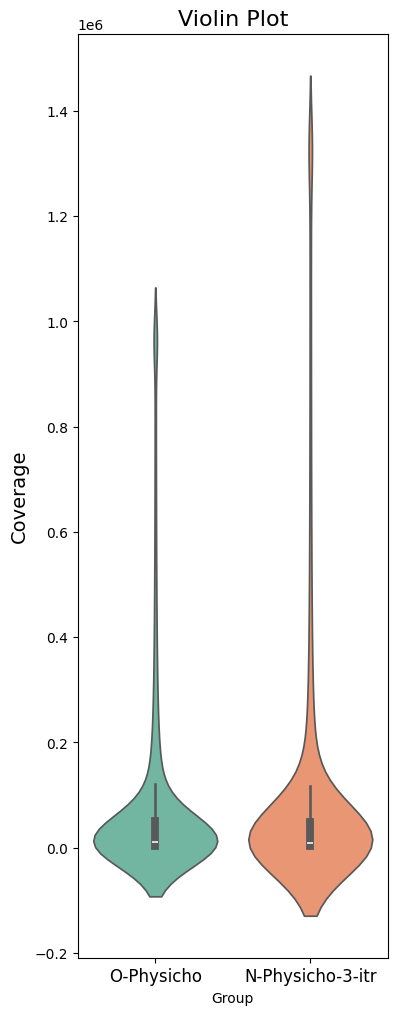

<ipython-input-19-72d3fde95ff4>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='coverage', data=combined_df, palette="Set2")


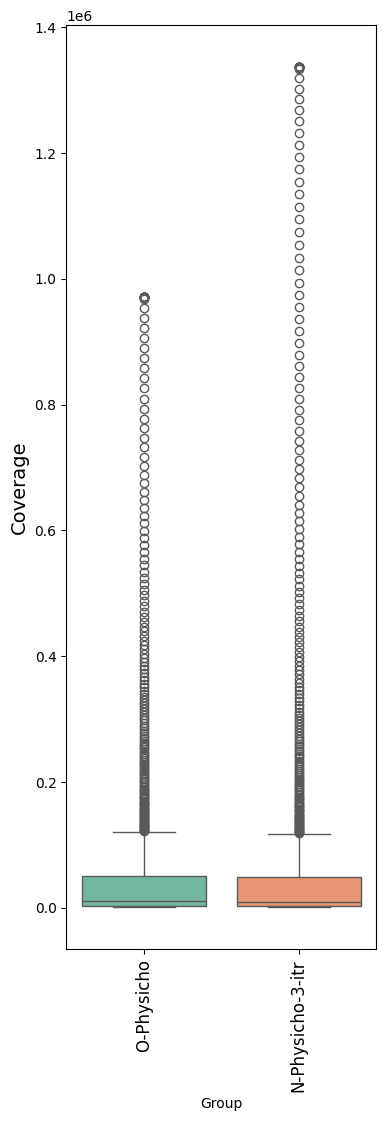

O-Physicho:
+-------------------+---------+--------------------+--------------------+
|        mean       |  median |       stdev        |      variance      |
+-------------------+---------+--------------------+--------------------+
| 81859.10920772947 | 10824.6 | 187828.00722207662 | 35279360297.016464 |
+-------------------+---------+--------------------+--------------------+
N-Physicho-itter-3:
+--------------------+---------+--------------------+-------------------+
|        mean        |  median |       stdev        |      variance     |
+--------------------+---------+--------------------+-------------------+
| 103560.36999033818 | 9814.05 | 261215.29152488676 | 68233428526.43158 |
+--------------------+---------+--------------------+-------------------+

**********************************************************************************************

Error:


<ipython-input-19-72d3fde95ff4>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Error', data=combined_df, palette="Set2")


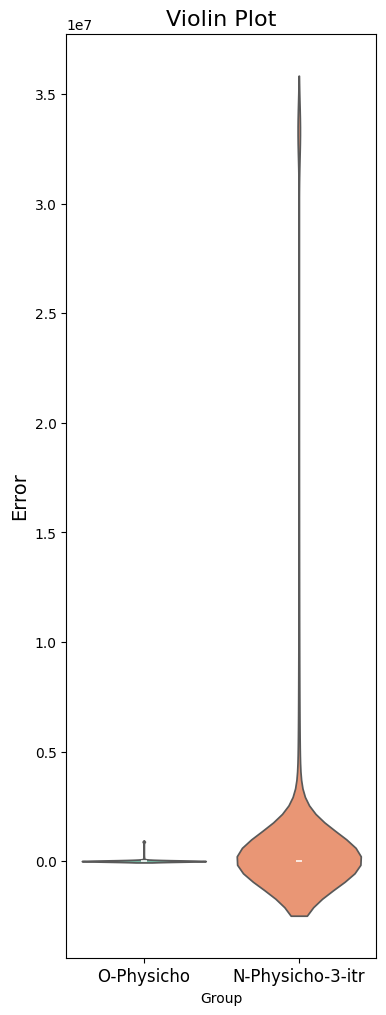

<ipython-input-19-72d3fde95ff4>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Error', data=combined_df, palette="Set2")


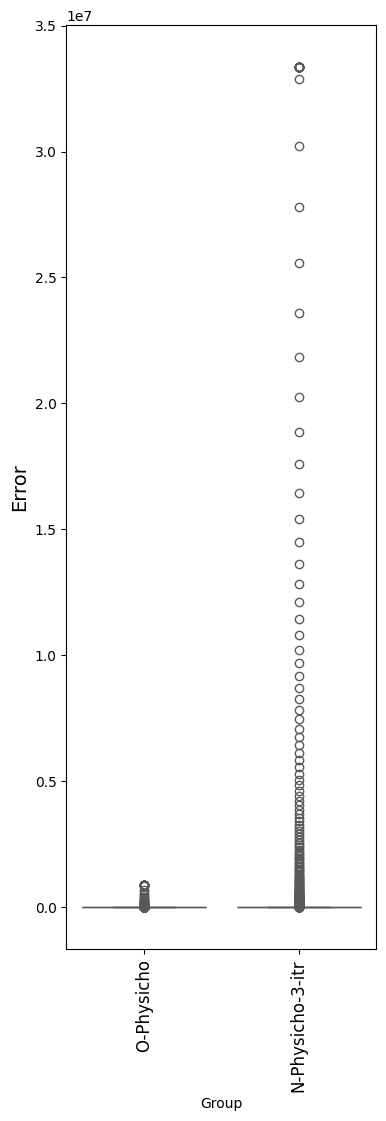

O-Physicho:
+--------------------+--------+--------------------+--------------------+
|        mean        | median |       stdev        |      variance      |
+--------------------+--------+--------------------+--------------------+
| 21477.836714975845 |  1.0   | 122000.35742771708 | 14884087212.490723 |
+--------------------+--------+--------------------+--------------------+
N-Physicho-itr-3:
+--------------------+--------+-------------------+--------------------+
|        mean        | median |       stdev       |      variance      |
+--------------------+--------+-------------------+--------------------+
| 1093621.9256038647 |  6.0   | 4995539.760372099 | 24955417497458.523 |
+--------------------+--------+-------------------+--------------------+


In [ ]:
# @title
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

print("COVERAGE:")
list1 = list(data2[0])
list2 = list(data[0])

# Create DataFrames for each list with unique indices
df11 = pd.DataFrame({'coverage': list1, 'Group': ['O-Physicho'] * len(list1)})
df22 = pd.DataFrame({'coverage': list2, 'Group': ['N-Physicho-3-itr'] * len(list2)})

# Combine the DataFrames without resetting the index
combined_df = pd.concat([df11, df22], ignore_index=True)

# تنظیم اندازه مستطیل عمودی‌تر
plt.figure(figsize=(4, 12))
sns.violinplot(x='Group', y='coverage', data=combined_df, palette="Set2")
plt.title('Violin Plot', fontsize=16)
plt.ylabel('Coverage', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.show()

plt.figure(figsize=(4, 12))
sns.boxplot(x='Group', y='coverage', data=combined_df, palette="Set2")
plt.ylabel('Coverage', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.show()

print("O-Physicho:")
headers = ["mean", "median", "stdev", "variance"]
values = [data2[0].mean(), data2[0].median(), data2[0].std(), data2[0].var()]
table = PrettyTable(headers)
table.add_row(values)
print(table)

print("N-Physicho-itter-3:")
values = [data[0].mean(), data[0].median(), data[0].std(), data[0].var()]
table = PrettyTable(headers)
table.add_row(values)
print(table)

print("\n**********************************************************************************************\n")

print("Error:")
list1 = list(data2[1])
list2 = list(data[1])

# Create DataFrames for each list with unique indices
df11 = pd.DataFrame({'Error': list1, 'Group': ['O-Physicho'] * len(list1)})
df22 = pd.DataFrame({'Error': list2, 'Group': ['N-Physicho-3-itr'] * len(list2)})

# Combine the DataFrames without resetting the index
combined_df = pd.concat([df11, df22], ignore_index=True)

# تنظیم اندازه مستطیل عمودی‌تر
plt.figure(figsize=(4, 12))
sns.violinplot(x='Group', y='Error', data=combined_df, palette="Set2")
plt.title('Violin Plot', fontsize=16)
plt.ylabel('Error', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.show()

plt.figure(figsize=(4, 12))
sns.boxplot(x='Group', y='Error', data=combined_df, palette="Set2")
plt.ylabel('Error', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.show()

print("O-Physicho:")
values = [data2[1].mean(), data2[1].median(), data2[1].std(), data2[1].var()]
table = PrettyTable(headers)
table.add_row(values)
print(table)

print("N-Physicho-itr-3:")
values = [data[1].mean(), data[1].median(), data[1].std(), data[1].var()]
table = PrettyTable(headers)
table.add_row(values)
print(table)



##NOTE
you need to replace the following paths with the paths of the below files in the environment you're running the notebook:

`file1_path --> path to the file results/metrics/search_sensitivity/AUC1-DIAMOND.txt`

`file2_path --> path to the file results/metrics/search_sensitivity/AUC1-MMseqs2.txt`


All files available [here](https://github.com/HadisAhmadian/DIAFold/tree/main/results)


In [ ]:

file1_path = res_p+'droc'
file2_path = res_p+'mroc'
df1 = pd.read_csv(file1_path, sep='\t', header=None)
df2 = pd.read_csv(file2_path, sep='\t', header=None)
df = df1[~df1[0].str.startswith('#')]
df1[1] = df[1].astype(float)
df = df2[~df2[0].str.startswith('#')]
df2[1] = df[1].astype(float)

<ipython-input-41-c4d77ead9477>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='AUC1', data=combined_df, palette="Set2")


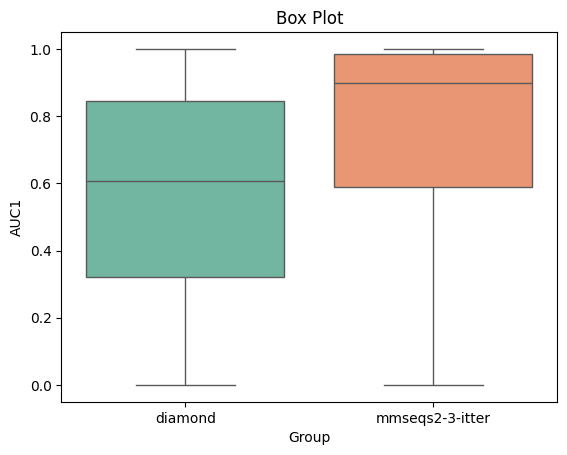

<ipython-input-41-c4d77ead9477>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='AUC1', data=combined_df, palette="Set2")


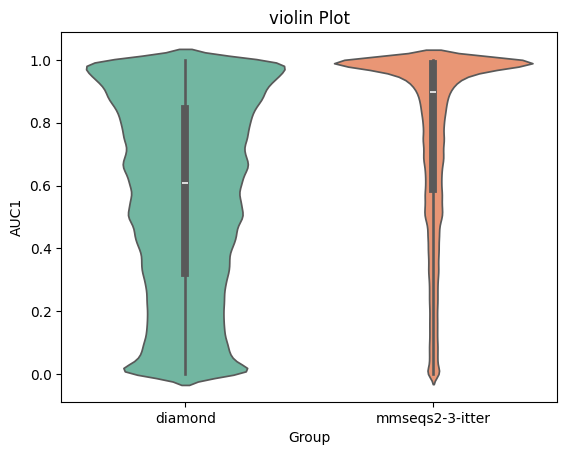

In [ ]:
# @title

list1 = list(df1[1])
list2 = list(df2[1])

# Create DataFrames for each list with unique indices
df11 = pd.DataFrame({'AUC1': list1, 'Group': ['diamond'] * len(list1)})
df22 = pd.DataFrame({'AUC1': list2, 'Group': ['mmseqs2-3-itter'] * len(list2)})

# Combine the DataFrames without resetting the index
combined_df = pd.concat([df11, df22], ignore_index=True)

# Plot the box plots using seaborn
sns.boxplot(x='Group', y='AUC1', data=combined_df, palette="Set2")
plt.title('Box Plot')
plt.ylabel('AUC1')
plt.show()

sns.violinplot(x='Group', y='AUC1', data=combined_df, palette="Set2")
plt.title('violin Plot')
plt.ylabel('AUC1')
plt.show()
